## Final Project Submission

Please fill out:
* Student name: Mohammed Siddiqui
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger
* Blog post URL:


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv("tn.movie_budgets.csv")

In [46]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,formatted_date
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009-12-18
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011-05-20
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019-06-07
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015-05-01
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017-12-15


In [5]:
def dollar_to_int(column):
    df[column] = df[column].str.replace(',', '')
    df[column] = df[column].str.replace('$', '')
    df[column] = df[column].astype(np.int64)
    return df

In [6]:
dollar_to_int('domestic_gross')
dollar_to_int('production_budget')
dollar_to_int('worldwide_gross')
df['formatted_date'] = pd.to_datetime(df['release_date'], format='%b %d, %Y')

In [7]:
df.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


In [8]:
df_title =pd.read_csv('title.basics.csv')
df_gross =pd.read_csv('bom.movie_gross.csv')
df_ratings =pd.read_csv('title.ratings.csv')
#df_rtrev =pd.read_csv('rt.reviews.tsv', sep="\t", encoding="ansi")
#df_rtinfo= pd.read_csv('rt.movie_info.tsv', sep="\t", encoding="ansi")

In [9]:
df_gross['foreign_gross'] = df_gross['foreign_gross'].str.replace(',', '')
df_gross['foreign_gross'] = df_gross['foreign_gross'].astype(np.float64)
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [27]:
df_title.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [24]:
#df_title.set_index("tconst", inplace=True)
df_ratings.set_index("tconst", inplace=True)
df_ratings.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [54]:
df_imdb = pd.merge(df_title, df_ratings,left_index=True, right_index=True, how='inner')
df_imdb.head(20)

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64


What are the smart people doing?,What are the dumb people doing?

(array([  360.,   967.,  2616.,  5030.,  9347., 15735., 19460., 13093.,
         6248.,  1000.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

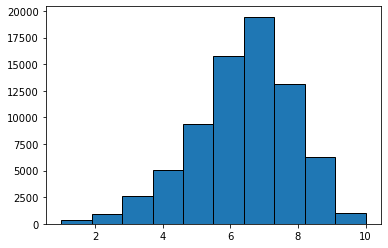

In [14]:
plt.hist(df_ratings['averagerating'], bins=10, edgecolor='black')

In [61]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt0063540 to tt9916160
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   original_title   73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


In [63]:
df_all = pd.merge(df_imdb, df_gross, left_on='primary_title', right_on='title', how='inner')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   object        
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   formatted_date     5782 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 316.3+ KB
